## BME1462: Morphological Image Processing II 



Material covered based on Digital Image Processing, Gonzalez and Woods, Prentice Hall, 4th edition 

Images Acquired from the Following Sources: 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color, img_as_float, filters, measure, exposure, morphology
from skimage.transform import resize, rotate
from scipy import ndimage

## Choosing Structuring Elements

### Size and Shape
The size of the structuring element will depend on the size of the features that you would want to detect and the image and the shape will also depend on the shape of the features. Usually, you would want to match the shape of the structuring element to the shape of the feature you want to detect

There are many options in sckimage.morphology: disks, squares, rectangles and crosses.

C:\Users\aaron\AppData\Local\Temp\ipykernel_11404\3618912136.py:9: FutureWarning: `binary_closing` is deprecated since version 0.26 and will be removed in version 0.28. Use `skimage.morphology.closing` instead.
  mask_closed = morphology.binary_closing(mask, morphology.disk(3))


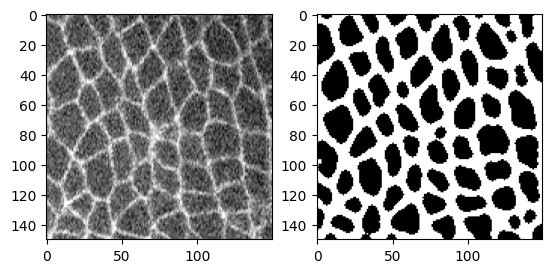

In [3]:
img = io.imread("cells.tif")
img_smooth = filters.gaussian(img, sigma = 2, preserve_range = True)
img_rescaled = exposure.rescale_intensity(
    img_smooth, out_range=np.uint8)

mask = img_rescaled >= filters.threshold_local(
    img_rescaled, 33, method='gaussian')

mask_closed = morphology.binary_closing(mask, morphology.disk(3))

fig, axs = plt.subplots(1, 2)
axs[0].imshow(img, cmap='Greys_r')
axs[1].imshow(mask_closed, cmap='binary_r')
plt.show()

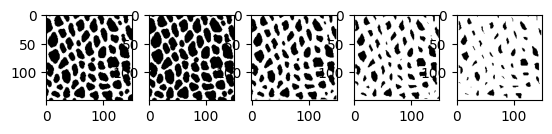

In [4]:
disk = morphology.disk(0.125)
small_square = morphology.footprint_rectangle((3,3))
mid_square = morphology.footprint_rectangle((5,5))
large_square = morphology.footprint_rectangle((7,7))

img_disk = ndimage.binary_hit_or_miss(~mask_closed, disk)
img_small_square = ndimage.binary_hit_or_miss(~mask_closed, small_square)
img_mid_square = ndimage.binary_hit_or_miss(~mask_closed, mid_square)
img_large_square = ndimage.binary_hit_or_miss(~mask_closed, large_square)

fig, axs = plt.subplots(1, 5)
axs[0].imshow(mask_closed, cmap='binary_r')
axs[1].imshow(img_disk, cmap='binary_r')
axs[2].imshow(~img_small_square, cmap='binary_r')
axs[3].imshow(~img_mid_square, cmap='binary_r')
axs[4].imshow(~img_large_square, cmap='binary_r')
plt.show()

## Combining Structuring Elements

Structuring elements can only detect specific features within an image. To find more complex objects in the image, structuring elements can be combined together. 

For example, detecting a "T" with a single structuring element might be difficult but a "T" can broken down into two parts: a horizontal bar and a vertical bar. We can find each and then combine them together to get our "T".

In [6]:
sample_image = np.array([
    [0,0,0,0,0,0,0],
    [1,1,1,1,1,1,1],
    [0,0,0,1,0,0,0],
    [0,0,0,1,0,0,0],
    [0,0,0,1,0,0,0],
    [0,0,0,1,0,0,0],
    [0,0,0,1,0,0,0]
])

sample_image_complement = 1 - sample_image

In [9]:
se_horizontal = np.array([
    [0,0,0],
    [1,1,1],
    [0,0,0]
])

se_vertical = np.array([
    [0,1,0],
    [0,1,0],
    [0,1,0]
])

se_background = np.array([
    [1,1,0],
    [1,1,0],
    [1,1,0]
])

In [10]:
# detecting the horizontal bar

foreground = ndimage.binary_erosion(sample_image, se_horizontal)
background_complement = ndimage.binary_erosion(sample_image_complement, se_background)
background = 1 - background_complement

horizontal_bar = foreground & background

In [11]:
# dectecting the vertical bar

foreground = ndimage.binary_erosion(sample_image, se_vertical)
background_complement = ndimage.binary_erosion(sample_image_complement, se_background)
background = 1 - background_complement

vertical_bar = foreground & background

In [12]:
# combining the horizontal and vertical bars

obj = vertical_bar | horizontal_bar

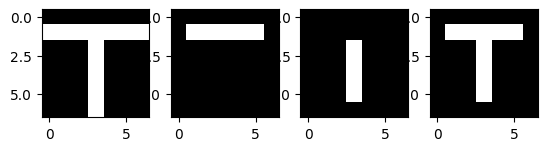

In [13]:
# comparison of the images

fig, axs = plt.subplots(1, 4)
axs[0].imshow(sample_image, cmap='binary_r')
axs[1].imshow(horizontal_bar, cmap='binary_r')
axs[2].imshow(vertical_bar, cmap='binary_r')
axs[3].imshow(obj, cmap='binary_r')
plt.show()